In [5]:
library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)

In [34]:
players <- read_csv("data/players.csv")
players <- players |> na.omit(df)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [35]:
players_exp <- players |>
    select(experience, subscribe)

players_exp_count <- players_exp |>
    group_by(experience, subscribe) |>
    count()

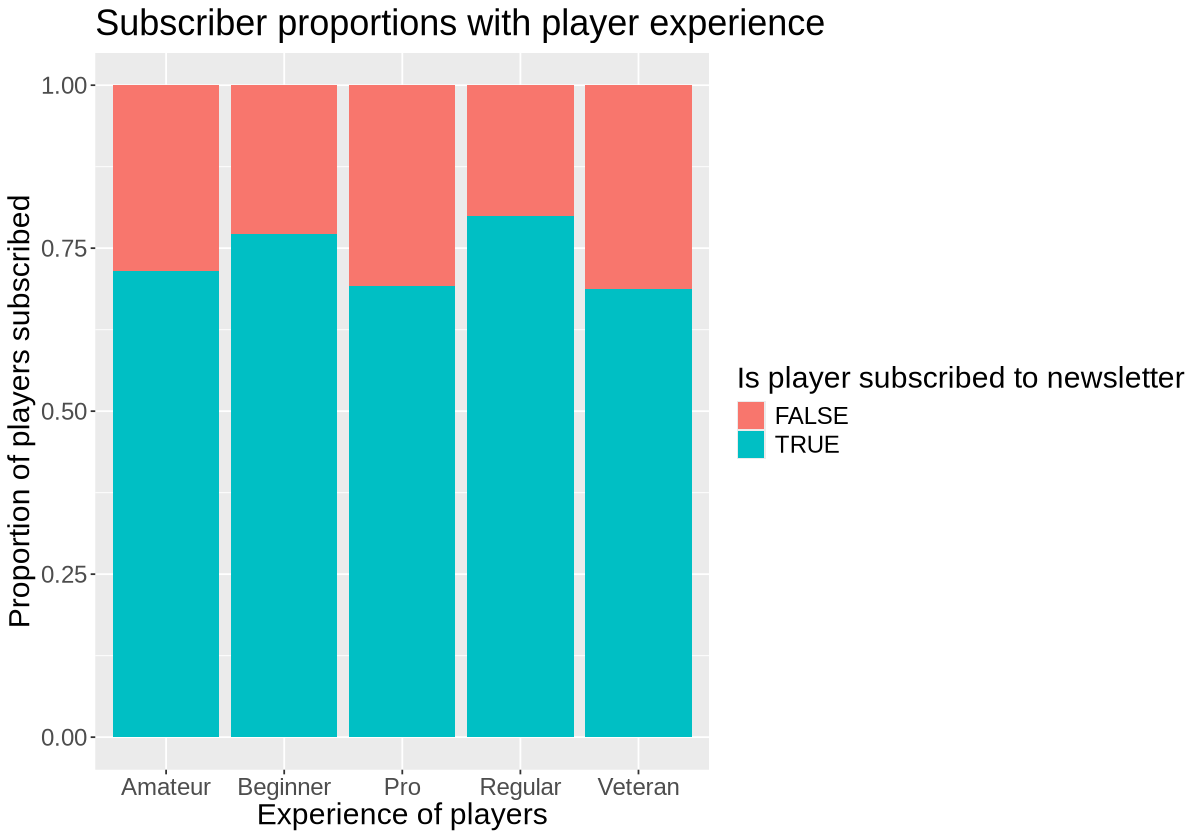

In [36]:
options(repr.plot.width = 10, repr.plot.height = 7)
players_exp_plot <- players_exp_count |>
    ggplot(aes(x = experience, y = n, fill = subscribe)) +
    geom_bar(stat = 'identity', position = 'fill') +
    labs(x = "Experience of players", y = "Proportion of players subscribed", title = "Subscriber proportions with player experience", 
            fill = "Is player subscribed to newsletter") +
    theme(text = element_text(size = 18))
players_exp_plot

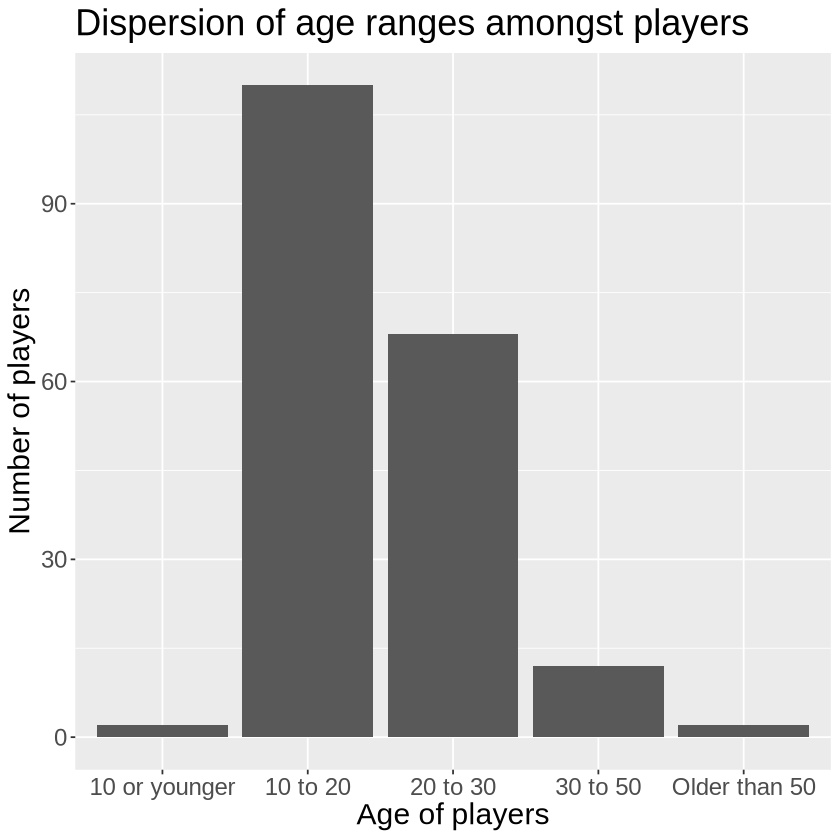

In [44]:
players_age <- players |>
    select(Age, subscribe)

players_age_ranges <- players_age |>
    mutate(
    range = case_when(
      Age <= 10 ~ "10 or younger",
      Age > 10 & Age <= 20 ~ "10 to 20",
      Age > 20 & Age <= 30 ~ "20 to 30",
      Age > 30 & Age <= 50 ~ "30 to 50",
      Age > 50 ~ "Older than 50" ))

players_age_ranges_count <- players_age_ranges |>
    group_by(range) |>
    count()

options(repr.plot.width = 7, repr.plot.height = 7)

players_age_range_count_plot <- players_age_ranges_count |>
    ggplot(aes(x = range, y = n)) +
    geom_bar(stat = 'identity', position = 'dodge') + 
     labs(x = "Age of players", y = "Number of players", title = "Dispersion of age ranges amongst players") +
    theme(text = element_text(size = 18))

players_age_range_count_plot